#  Data Preparation Example for Machine Learning

#  Key Techniques in Data Preparation for Machine Learning

Effective data preparation is essential for building robust machine learning models. This document summarizes and elaborates on the key techniques involved in preparing data for supervised and unsupervised learning tasks.

##  1. Understanding Types of Data

There are two types of data.  Qualitataive data describes characteristics of an object, while quantitative data describes the quantity of an object.

###  Qualitative (Categorical) Data
- **Nominal**: Named categories with no order (e.g., gender, country).
  - Cannot perform arithmetic operations.
  - Encoded using one-hot or label encoding.
- **Ordinal**: Categories with a natural order (e.g., satisfaction: low, medium, high).
  - Often encoded with integer mapping, preserving order.

###  Quantitative (Numerical) Data
- **Interval**: Numeric values with meaningful differences, but no true zero (e.g., temperature in Celsius).
  - Can compute mean, median, std deviation.
- **Ratio**: Numeric values with a true zero (e.g., income, age).
  - All arithmetic operations valid.

###  Discrete vs. Continuous Attributes
- **Discrete**: Countable values (e.g., number of children).
- **Continuous**: Infinite values within a range (e.g., height, weight).


##  2. Exploring and Summarizing Data

One we obtained data (data collection) from the real world, we need to explore and summarize the data (data analysis).  Visualization is often used in this stage to understand the data distribution (measures of data spread).

###  Measures of Central Tendency
- **Mean**: Sensitive to outliers.
- **Median**: Robust to outliers, useful in skewed data.
- **Mode**: Most frequently occurring value.

###  Measures of Spread
- **Variance & Standard Deviation**: Show how data is distributed around the mean.
- **Range, Quartiles, IQR**: Help detect outliers and data skew.


##  3. Visualizing Data

There are many ways to visualize data.  Here are some common ones.
In the examples we will use the `matplotlib` library to plot them.

###  Box Plot
- Visualizes five-number summary: min, Q1, median, Q3, max.
- Highlights outliers beyond 1.5 × IQR.

###  Histogram
- Shows frequency distribution.
- Helps identify skewness, modality, and spread.

###  Scatter Plot
- Used for bivariate relationships.
- Reveals correlation and patterns between two variables.

###  Cross-tabulation
- Used to explore relationships between categorical variables.
- Displays frequency distribution in a matrix.


##  4. Data Quality Issues and Remediation

Handling missing values and outliers is an important step in data preparation.  Real world data, often than not, are far from perfect.  Missing data, outliers, and many other issues need to be addressed in this step for effective machine learning.

###  Missing Values
- **Causes**: Survey non-responses, manual entry errors, data corruption.
- **Remedies**:
  - **Deletion**: Remove rows/columns with missing data (only if safe).
  - **Imputation**:
    - Mean/Median (numerical)
    - Mode (categorical)
    - Group-based imputation (e.g., by similar rows)
  - **Model-based estimation**: Use predictive modeling or similarity functions.

Deletion is often applied when we don't lose much information by deleting some rows of data.  This is often associated with the `dropna()` method.  Imputation on the other hand may become a more practical method to preserve important data attributes while not affecting the data distribution by supplying artificial values for the missing data.  

### What is Imputation?
Imputation is the process of replacing missing data with substituted values. It's crucial because most ML algorithms cannot handle missing values directly.

### Common Imputation Methods:
1. **Mean/Median Imputation**: Replace missing values with the mean or median of the column.
   - Best for: Normally distributed data without outliers
   - When to use: When data is missing completely at random

2. **Group-based Imputation**: Replace missing values with the mean/median of a group
   - Best for: When data has meaningful groups
   - Example: Filling missing horsepower based on car cylinder count

3. **KNN Imputation**: Use k-nearest neighbors to impute missing values
   - Best for: When patterns exist in the data
   - Most accurate but computationally expensive

4. **Arbitrary Value Imputation**: Replace with a value like -999
   - Best for: Tree-based models
   - When to use: When you want to make missing values stand out

###  Outliers
Outliers are data points significantly different from other observations. They can be caused by measurement errors, data entry errors, or natural variations.

### Impact of Outliers:
- Can skew statistical measures
- May affect model performance
- Can cause models to be overly influenced by extreme values

### Detection Methods:
1. **IQR Method**:
   - Calculate Q1 (25th percentile) and Q3 (75th percentile)
   - IQR = Q3 - Q1
   - Lower bound = Q1 - 1.5*IQR
   - Upper bound = Q3 + 1.5*IQR
   - Points outside these bounds are considered outliers

2. **Z-score Method**:
   - Calculate z-scores: z = (x - mean) / std
   - Points with |z| > 3 are typically considered outliers

### Handling Techniques:
1. **Capping (Winsorization)**: Replace outliers with the nearest non-outlier value
2. **Transformation**: Apply log, square root, or other transformations
3. **Removal**: If outliers are errors or not representative
4. **Separate Modeling**: Create a separate model for outliers

##  5. Feature Scaling

Many machine learning algorithms perform better or converge faster when features are on similar scales.  Scaling also ensures that features with different magnitudes do not dominate model learning.

###  Standardization (Z-score)
$$
x' = \frac{x - \mu}{\sigma}
$$
- Centers data at 0 mean and unit variance.
- Used when data has outliers or normal distribution.

###  Normalization (Min-Max Scaling)
$$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$
- Scales features to [0, 1] range.
- Sensitive to outliers.

### Robust Scaling
   - Uses median and IQR
   - Formula: (x - median) / IQR
   - Best for: Data with outliers

###  When to Scale?
- **Required for**:
  - Distance-based algorithms (KNN, K-means, SVM with RBF kernel)
  - Neural networks
  - Regularized models (Ridge, Lasso)
  - PCA
- **Not needed for**:
  - Tree-based models (Decision Trees, Random Forest, XGBoost)
  - Naive Bayes


##  6. Dimensionality Reduction

Reduces the number of features while preserving important information.

### Why Reduce Dimensions?
1. **Curse of Dimensionality**: As dimensions increase, data becomes sparse
2. **Reduces Overfitting**: Fewer features mean fewer parameters to learn
3. **Speeds Up Training**: Less computation required
4. **Improves Visualization**: Easier to visualize 2D or 3D data

### Principal Component Analysis (PCA)
- Projects data onto principal components that maximize variance
- Steps:
  1. Standardize the data
  2. Calculate covariance matrix
  3. Calculate eigenvectors and eigenvalues
  4. Select top k eigenvectors
  5. Transform data to new space

### When to Use:
- When features are correlated
- For visualization
- Before training models with many features
- For noise reduction

###  SVD (Singular Value Decomposition)
- Matrix factorization method to identify latent features.


##  7. Feature Selection

Selects the most relevant subset of features to:
- Reduce overfitting
- Improve model interpretability
- Lower computational cost

###  Types of Features:
- **Irrelevant**: Contribute no predictive power.
- **Redundant**: Duplicate information from other features.

###  Methods:
1. **Filter Methods**:
   - Select features based on statistical tests
   - Example: Correlation coefficient, Chi-square test
   - Fast but doesn't consider feature interactions

2. **Wrapper Methods**:
   - Use a subset of features and train a model
   - Example: Recursive Feature Elimination (RFE)
   - Computationally expensive but more accurate

3. **Embedded Methods**:
   - Feature selection as part of the model training process
   - Example: Lasso regression, Decision trees
   - Efficient and accurate but model-specific


##  Summary Table

| Task                           | Technique                                |
|--------------------------------|------------------------------------------|
| Identify variable types        | Nominal, Ordinal, Interval, Ratio        |
| Summarize numeric data         | Mean, Median, Std Dev, IQR               |
| Visualize data                 | Histogram, Box plot, Scatter plot        |
| Handle missing values          | Drop, Impute, Predict                    |
| Treat outliers                 | Remove, Cap, Investigate                 |
| Scale features                 | Standardize, Normalize                   |
| Reduce dimensions              | PCA, SVD                                 |
| Select features                | Filter, Wrapper, Embedded Methods        |



This notebook illustrates key technical points from data preparation for machine learning using a **fake dataset** about car attributes and fuel efficiency.


##  Example Dataset

In [11]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression

# Fake dataset
data = {
    "car_name": ["car_a", "car_b", "car_c", "car_d", "car_e", "car_f"],
    "cylinders": [4, 6, 8, 4, 4, 8],
    "displacement": [140, 200, 360, 150, 130, 3700],
    "horsepower": [90, 105, 215, 92, np.nan, 220], # np (numpy - numeric python - library for scientific computing. nan: not a number/null)
    "weight": [2400, 3000, 4300, 2500, 2200, 4400],
    "acceleration": [15.5, 14.0, 12.5, 16.0, 15.0, 11.0],
    "model_year": [80, 78, 76, 82, 81, 77],
    "origin": [1, 1, 1, 2, 3, 1],
    "mpg": [30.5, 24.0, 13.0, 29.5, 32.0, 10.0]
}
df = pd.DataFrame(data)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,car_a,4,140,90.0,2400,15.5,80,1,30.5
1,car_b,6,200,105.0,3000,14.0,78,1,24.0
2,car_c,8,360,215.0,4300,12.5,76,1,13.0
3,car_d,4,150,92.0,2500,16.0,82,2,29.5
4,car_e,4,130,NaN,2200,15.0,81,3,32.0
5,car_f,8,3700,220.0,4400,11.0,77,1,10.0


##  Data Types


- `car_name`: Nominal (categorical)
- `cylinders`, `origin`: Ordinal/Categorical
- `displacement`, `horsepower`, `weight`, `acceleration`, `mpg`: Ratio (numeric)
- `model_year`: Interval


##  Handling Missing Values

In [12]:
# 1. Handling Missing Values Example
print("=== Missing Values Before Imputation ===")
print(df.isna().sum())

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df['horsepower_mean'] = mean_imputer.fit_transform(df[['horsepower']])

# Group-based imputation
group_means = df.groupby('cylinders')['horsepower'].transform('mean')
df['horsepower_group'] = df['horsepower'].fillna(group_means)

# KNN imputation
knn_imputer = KNNImputer(n_neighbors=2)
df['horsepower_knn'] = knn_imputer.fit_transform(df[['horsepower']])

print("\n=== After Imputation ===")
df[['horsepower', 'horsepower_mean', 'horsepower_group', 'horsepower_knn']]

=== Missing Values Before Imputation ===
car_name        0
cylinders       0
displacement    0
horsepower      1
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

=== After Imputation ===


,horsepower,horsepower_mean,horsepower_group,horsepower_knn
0,90.0,90.0,90.0,90.0
1,105.0,105.0,105.0,105.0
2,215.0,215.0,215.0,215.0
3,92.0,92.0,92.0,92.0
4,NaN,144.4,91.0,144.4
5,220.0,220.0,220.0,220.0


##  Handling Outliers

Detected 1 outliers in displacement


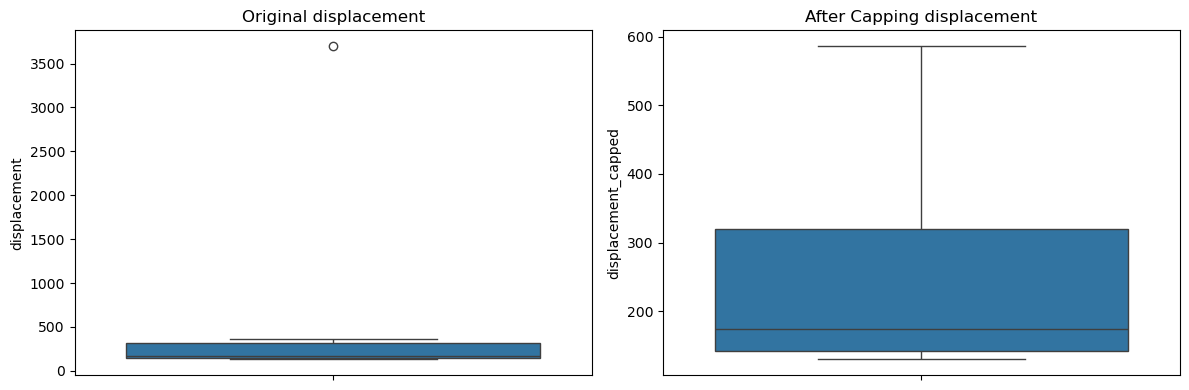

In [13]:
# 2. Handling Outliers Example
def detect_and_handle_outliers(df, column):
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Detected {len(outliers)} outliers in {column}')

    # Visualize before and after
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'Original {column}')

    # Capping outliers
    df[f'{column}_capped'] = np.where(df[column] > upper_bound, upper_bound,
                                     np.where(df[column] < lower_bound, lower_bound, df[column]))

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[f'{column}_capped'])
    plt.title(f'After Capping {column}')

    plt.tight_layout()
    plt.show()

    return df

df = detect_and_handle_outliers(df, 'displacement')

##  Feature Scaling (Standardization)

In [14]:
# 3. Feature Scaling Example
# Original data
numeric_cols = ['weight', 'acceleration', 'displacement']
print('Original data:')
print(df[numeric_cols].head())

# Standardization
scaler = StandardScaler()
df_std = df.copy()
df_std[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Min-Max Scaling
minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax.fit_transform(df[numeric_cols])

print('\nStandardized data (mean=0, std=1):')
print(df_std[numeric_cols].head())

print('Min-Max Scaled data (range [0,1]):')
print(df_minmax[numeric_cols].head())

Original data:
   weight  acceleration  displacement
0    2400          15.5           140
1    3000          14.0           200
2    4300          12.5           360
3    2500          16.0           150
4    2200          15.0           130

Standardized data (mean=0, std=1):
     weight  acceleration  displacement
0 -0.820462      0.854242     -0.489225
1 -0.149175      0.000000     -0.443360
2  1.305280     -0.854242     -0.321054
3 -0.708580      1.138990     -0.481581
4 -1.044224      0.569495     -0.496869
Min-Max Scaled data (range [0,1]):
     weight  acceleration  displacement
0  0.090909           0.9      0.002801
1  0.363636           0.6      0.019608
2  0.954545           0.3      0.064426
3  0.136364           1.0      0.005602
4  0.000000           0.8      0.000000


##  Box Plot Visualization

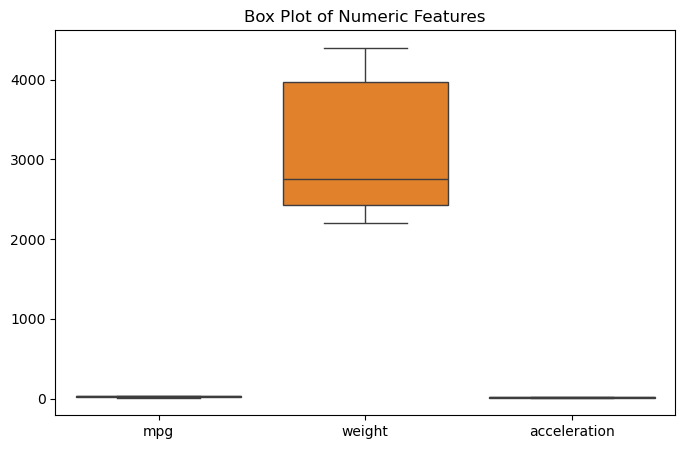

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['mpg', 'weight', 'acceleration']])
plt.title("Box Plot of Numeric Features")
plt.show()

##  Histogram

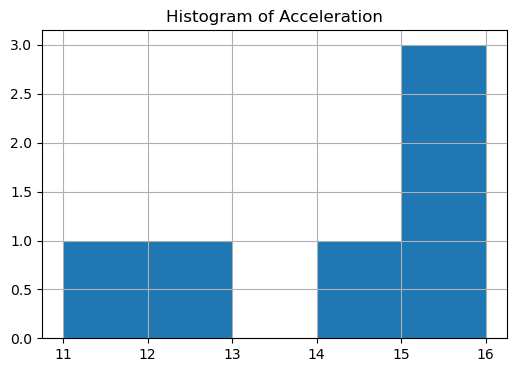

In [6]:
df[['acceleration']].hist(bins=5, figsize=(6, 4))
plt.title("Histogram of Acceleration")
plt.show()

##  Scatter Plot

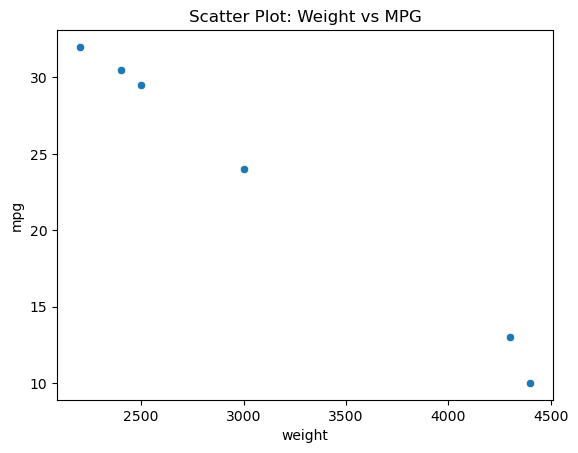

In [7]:
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title("Scatter Plot: Weight vs MPG")
plt.show()

##  Cross-Tabulation

In [8]:
pd.crosstab(df['origin'], df['cylinders'])

cylinders,4,6,8
origin,,,
1,1,1,2
2,1,0,0
3,1,0,0


##  Dimensionality Reduction (PCA)

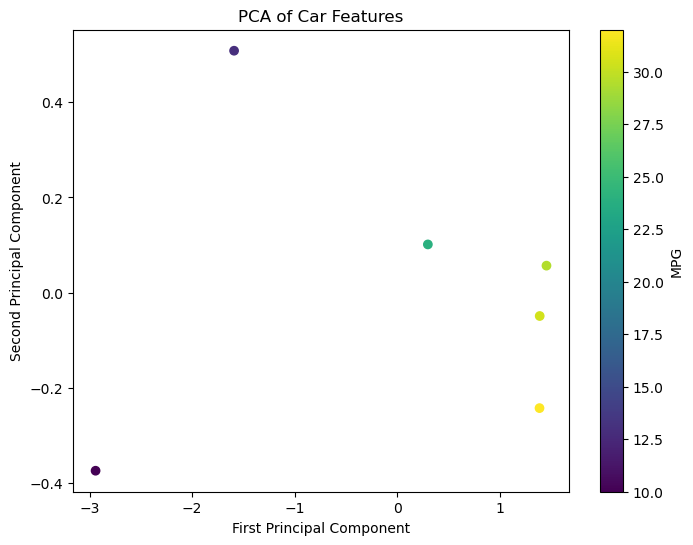

Explained variance ratio: [0.95929265 0.02632386]
Total explained variance: 0.99%


In [15]:
# 4. Dimensionality Reduction Example
# Prepare data for PCA
X = df[['weight', 'acceleration', 'displacement_capped']]
y = df['mpg']

# Standardize the data first
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new dataframe for the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['mpg'] = y.values

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['mpg'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='MPG')
plt.title('PCA of Car Features')
plt.show()

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Total explained variance: {sum(pca.explained_variance_ratio_):.2f}%')

##  Feature Selection

We might drop `car_name` or `model_year` if they are found irrelevant using feature importance techniques.